<a href="https://colab.research.google.com/github/LokeshDandumahanti/Code00/blob/main/nanogpt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Intro


In [1]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://gist.githubusercontent.com/flackend/18014f35d32b37c595b138f666b2108f/raw/99494b71652af807e77560b1d83ebbc5ed4c2f32/sorcerers-stone.txt -O "/content/drive/MyDrive/saved_models/sorcerers-stone.txt"


--2024-05-01 04:01:24--  https://gist.githubusercontent.com/flackend/18014f35d32b37c595b138f666b2108f/raw/99494b71652af807e77560b1d83ebbc5ed4c2f32/sorcerers-stone.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459564 (449K) [text/plain]
Saving to: ‘/content/drive/MyDrive/saved_models/sorcerers-stone.txt’

/content/drive/MyDr 100%[===================>] 448.79K  --.-KB/s    in 0.04s   

2024-05-01 04:01:24 (12.1 MB/s) - ‘/content/drive/MyDrive/saved_models/sorcerers-stone.txt’ saved [459564/459564]



In [2]:
!pip install -U keepsake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.9 MB/s eta 0:00:00


In [3]:
import keepsake
from keepsake import experiment

#2. Reading and exploring the data

In [4]:
# read it in to inspect it
with open('/content/drive/MyDrive/saved_models/sorcerers-stone.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [5]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  441832


In [6]:
#let's look at the first 1000 characters
print(text[:1000])

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive,
were proud to say that they were perfectly normal,
thank you very much. They were the last people you’d
expect to be involved in anything strange or
mysterious, because they just didn’t hold with such
nonsense.

Mr. Dursley was the director of a firm called
Grunnings, which made drills. He was a big, beefy
man with hardly any neck, although he did have a
very large mustache. Mrs. Dursley was thin and
blonde and had nearly twice the usual amount of
neck, which came in very useful as she spent so
much of her time craning over garden fences, spying
on the neighbors. The Dursley s had a small son
called Dudley and in their opinion there was no finer
boy anywhere.

The Dursleys had everything they wanted, but they
also had a secret, and their greatest fear was that
somebody would discover it. They didn’t think they
could bear it if anyone found out about the Potters.
Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t

#3. Tokenization and train/val split


1. here basically all the characters are sorted and then assigned a number for each one of them.
2. then each of the character is then encodeded to a number till whole dataset is converted into a string of numbers
3. then it is broke into training and testing dataset
4. After that a neuron is

In [7]:
#here are all the unique characters that occur in this text

chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"'(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWYZ\abcdefghijklmnopqrstuvwxyz—‘’“”•■
83


In [8]:
#create a mapping from characters to integers

stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder : take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l])

print(encode("hi there"))
print(decode(encode("hi there")))

[57, 58, 1, 69, 57, 54, 67, 54]
hi there


In [9]:
# let's now encode the entire text dataset and store it into a'torch.Tensor
import torch # we use PyTorch: http://pytorch.org
data = torch.tensor(encode(text), dtype = torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([441832]) torch.int64
tensor([43, 31, 28,  1, 25, 38, 47,  1, 46, 31, 38,  1, 35, 32, 45, 28, 27,  0,
         0, 36, 67,  9,  1, 50, 63, 53,  1, 36, 67, 68,  9,  1, 27, 70, 67, 68,
        61, 54, 74,  7,  1, 64, 55,  1, 63, 70, 62, 51, 54, 67,  1, 55, 64, 70,
        67,  7,  1, 39, 67, 58, 71, 54, 69,  1, 27, 67, 58, 71, 54,  7,  0, 72,
        54, 67, 54,  1, 65, 67, 64, 70, 53,  1, 69, 64,  1, 68, 50, 74,  1, 69,
        57, 50, 69,  1, 69, 57, 54, 74,  1, 72, 54, 67, 54,  1, 65, 54, 67, 55,
        54, 52, 69, 61, 74,  1, 63, 64, 67, 62, 50, 61,  7,  0, 69, 57, 50, 63,
        60,  1, 74, 64, 70,  1, 71, 54, 67, 74,  1, 62, 70, 52, 57,  9,  1, 43,
        57, 54, 74,  1, 72, 54, 67, 54,  1, 69, 57, 54,  1, 61, 50, 68, 69,  1,
        65, 54, 64, 65, 61, 54,  1, 74, 64, 70, 78, 53,  0, 54, 73, 65, 54, 52,
        69,  1, 69, 64,  1, 51, 54,  1, 58, 63, 71, 64, 61, 71, 54, 53,  1, 58,
        63,  1, 50, 63, 74, 69, 57, 58, 63, 56,  1, 68, 69, 67, 50, 63, 56, 54,
       

In [10]:
#Let's now split up the data into train and validation sets

n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [11]:
block_size = 8
train_data[:block_size + 1]

tensor([43, 31, 28,  1, 25, 38, 47,  1, 46])

In [12]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"when input is {context} the target: {target}")

when input is tensor([43]) the target: 31
when input is tensor([43, 31]) the target: 28
when input is tensor([43, 31, 28]) the target: 1
when input is tensor([43, 31, 28,  1]) the target: 25
when input is tensor([43, 31, 28,  1, 25]) the target: 38
when input is tensor([43, 31, 28,  1, 25, 38]) the target: 47
when input is tensor([43, 31, 28,  1, 25, 38, 47]) the target: 1
when input is tensor([43, 31, 28,  1, 25, 38, 47,  1]) the target: 46


#4. Data loader : batches of chunks of data

In [13]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

def get_batch(split):
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i : i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x,y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('-----')

for b in range(batch_size):
  for t in range(block_size):
    context = xb[b, :t+1]
    target = yb[b,t]
    print(f"when input is {context.tolist()} the target: {target}")



inputs:
torch.Size([4, 8])
tensor([[55,  1, 69, 57, 54,  0, 27, 70],
        [53,  1, 58, 69,  1, 64, 63, 69],
        [ 1, 65, 64, 58, 63, 69, 68,  1],
        [ 1, 64, 70, 69,  1, 58, 63, 69]])
targets:
torch.Size([4, 8])
tensor([[ 1, 69, 57, 54,  0, 27, 70, 67],
        [ 1, 58, 69,  1, 64, 63, 69, 64],
        [65, 64, 58, 63, 69, 68,  1, 55],
        [64, 70, 69,  1, 58, 63, 69, 64]])
-----
when input is [55] the target: 1
when input is [55, 1] the target: 69
when input is [55, 1, 69] the target: 57
when input is [55, 1, 69, 57] the target: 54
when input is [55, 1, 69, 57, 54] the target: 0
when input is [55, 1, 69, 57, 54, 0] the target: 27
when input is [55, 1, 69, 57, 54, 0, 27] the target: 70
when input is [55, 1, 69, 57, 54, 0, 27, 70] the target: 67
when input is [53] the target: 1
when input is [53, 1] the target: 58
when input is [53, 1, 58] the target: 69
when input is [53, 1, 58, 69] the target: 1
when input is [53, 1, 58, 69, 1] the target: 64
when input is [53, 1, 58, 

In [14]:
print(xb)

tensor([[55,  1, 69, 57, 54,  0, 27, 70],
        [53,  1, 58, 69,  1, 64, 63, 69],
        [ 1, 65, 64, 58, 63, 69, 68,  1],
        [ 1, 64, 70, 69,  1, 58, 63, 69]])


#5. Simplest baseline: bigram language model, loss, generation



In [16]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 83])
tensor(4.3570, grad_fn=<NllLossBackward0>)

44;5’L,OB)!,2W/()7fd Ckxae"jR!Dtre0qUG“kB5(;QW•N
G—oAhhv"SsGgj4yF-H9q:Ug■jgDJ4S11Bv!6Ulpnlitw;h’()KP


#6. Training the Bigram Model


In [17]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [18]:
batch_size = 32
for steps in range(100): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


4.714195728302002


#7. Port our code to a script

In [19]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


)T
UT6t•-!K?n-Jqn3nIrtE\MY,3nb849Gy'hyNb1!?ZWlElwlwp■Lgnsod‘,J"4E/o'Z,lPA8cT‘QJ;l4GFll:qL!hztmoT!RJtKPxx:cJ!aCnm-H4Pxbnw?- k!ERFk"y0n-(!NkWYK7hC2NY■xO75TMB;6,Z'Lz C
egMj2pf—sOgrYW9'—M l4•12"yF6orjlaO.”y'5RSEQ7ZLr6z2 k‘WIkPl0l(lC
lW928?7s0a“pntsESg?5■‘n6OFaKao“UL’rLP;;n-oJjOESGsVT,JgsJl-RCh!7IJwZ
akSn
:xSW-J.uS”Vq)nh:e0■DZ■I’e,P)d
w‘nGpmx, WeZW(BR)"2Yj7vLS)TFy‘”tm N
5AbkFj•k.,ZKy3FKH49RRMOYMs Na“p8Nx8NI3”■M?OBzK84V”tY'—ISuqGsfC■1FJHQ5W/Pz.LrKsz):Y5vor5K0nt84s”:x‘/gN3ntBR"1qT2NwZnx!vKZE3N.w6r?f?T 


#8. The trick in self-attention: matrix multiply as weight aggregation

In [20]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [21]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [22]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)

#9. V2: Using matrix multiplication

In [23]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2)

False

#10. V3. Adding softmax

In [24]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


False

#12. V4. self attention

In [25]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [26]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

#13. n1: attention as communication


Notes:

1. Attention is a communication mechanism. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
2. There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
3. Each example across batch dimension is of course processed completely independently and never "talk" to each other
4.In an "encoder" attention block just delete the single line that does masking with tril, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
5. "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
6. "Scaled" attention additional divides wei by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

#14. Inserting a single self-attention block to our network

In [ ]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [ ]:
k.var()

tensor(1.0449)

In [ ]:
q.var()

tensor(1.0700)

In [ ]:
wei.var()

tensor(1.0918)

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [ ]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [ ]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [ ]:
# French to English translation example:

# <--------- ENCODE ------------------><--------------- DECODE ----------------->
# les réseaux de neurones sont géniaux! <START> neural networks are awesome!<END>



#15. Creating Model

In [27]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 200
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('/content/drive/MyDrive/saved_models/sorcerers-stone.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

#Creating Model 2

In [28]:
model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

0.212051 M parameters


In [29]:
'''
model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()'''

'\nmodel = BigramLanguageModel()\nm = model.to(device)\n# print the number of parameters in the model\nprint(sum(p.numel() for p in m.parameters())/1e6, \'M parameters\')\n\n# create a PyTorch optimizer\noptimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)\n\nfor iter in range(max_iters):\n\n    # every once in a while evaluate the loss on train and val sets\n    if iter % eval_interval == 0 or iter == max_iters - 1:\n        losses = estimate_loss()\n        print(f"step {iter}: train loss {losses[\'train\']:.4f}, val loss {losses[\'val\']:.4f}")\n\n    # sample a batch of data\n    xb, yb = get_batch(\'train\')\n\n    # evaluate the loss\n    logits, loss = model(xb, yb)\n    optimizer.zero_grad(set_to_none=True)\n    loss.backward()\n    optimizer.step()'

In [30]:
'''
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

'''

'\nfor iter in range(max_iters):\n\n    # every once in a while evaluate the loss on train and val sets\n    if iter % eval_interval == 0 or iter == max_iters - 1:\n        losses = estimate_loss()\n        print(f"step {iter}: train loss {losses[\'train\']:.4f}, val loss {losses[\'val\']:.4f}")\n\n    # sample a batch of data\n    xb, yb = get_batch(\'train\')\n\n    # evaluate the loss\n    logits, loss = model(xb, yb)\n    optimizer.zero_grad(set_to_none=True)\n    loss.backward()\n    optimizer.step()\n\n'

In [31]:
'''
import torch
import torch.nn as nn
from torch.nn import functional as F
import keepsake

# hyperparameters
batch_size = 16
block_size = 32
max_iters = 200
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)

# Initialize the experiment with hyperparameters
experiment = keepsake.init(
    params={"batch_size": batch_size, "block_size": block_size, "max_iters": max_iters, "learning_rate": learning_rate},
)

# Your existing code here...

for iter in range(max_iters):
    model.train()

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        torch.save(model, "model.pth")
        # Create a checkpoint within the experiment.
        # This saves the metrics at that point, and makes a copy of the file
        # or directory given, which could weights and any other artifacts.
        experiment.checkpoint(
            path="model.pth",
            step=max_iters,
            metrics={"loss": loss.item(), "accuracy": acc},
            primary_metric=("loss", "minimize"),
        )
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# Mark the end of the experiment
experiment.stop()
'''

'\nimport torch\nimport torch.nn as nn\nfrom torch.nn import functional as F\nimport keepsake\n\n# hyperparameters\nbatch_size = 16\nblock_size = 32\nmax_iters = 200\neval_interval = 100\nlearning_rate = 1e-3\ndevice = \'cuda\' if torch.cuda.is_available() else \'cpu\'\neval_iters = 200\nn_embd = 64\nn_head = 4\nn_layer = 4\ndropout = 0.0\n\ntorch.manual_seed(1337)\n\n# Initialize the experiment with hyperparameters\nexperiment = keepsake.init(\n    params={"batch_size": batch_size, "block_size": block_size, "max_iters": max_iters, "learning_rate": learning_rate},\n)\n\n# Your existing code here...\n\nfor iter in range(max_iters):\n    model.train()\n\n    # every once in a while evaluate the loss on train and val sets\n    if iter % eval_interval == 0 or iter == max_iters - 1:\n        losses = estimate_loss()\n        print(f"step {iter}: train loss {losses[\'train\']:.4f}, val loss {losses[\'val\']:.4f}")\n\n        torch.save(model, "model.pth")\n        # Create a checkpoint withi

In [32]:
'''
import torch
from torch import nn
from torch.autograd import Variable
import keepsake
import os
import matplotlib.pyplot as plt

# Specify the repository path
repository_path = "file:///content/drive/MyDrive/saved_models/Dream5.keepsake"
# Create the keepsake.yaml file
with open("keepsake.yaml", "w") as file:
    file.write(f"repository: \"{repository_path}\"")

def train(learning_rate=0.1, num_epochs=25):
    # Create an "experiment". This represents a run of your training script.
    # It saves the hyperparameters you used to start the experiment.
    experiment = keepsake.init(
        params={"learning_rate": learning_rate, "num_epochs": num_epochs},
    )

    model = BigramLanguageModel()
    m = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for iter in range(max_iters):
        model.train()
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss()
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

            # Save model checkpoint
            torch.save(model.state_dict(), "model.pth")

            # Create a checkpoint within the experiment.
            # This saves the metrics at that point, and makes a copy of the file
            # or directory given, which could weights and any other artifacts.
            experiment.checkpoint(
                path="model.pth",
                step=iter,
                metrics={"train_loss": losses["train"], "val_loss": losses["val"]},
                primary_metric=("loss", "minimize"),
            )

        # Sample a batch of data
        xb, yb = get_batch('train')

        # Evaluate the loss
        logits, loss = model(xb, yb)  # Assuming model returns logits and loss
        logits = torch.tensor(logits)
        yb = torch.tensor(yb)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

            # Plot the loss versus step graph
        plt.plot(range(0, max_iters, eval_interval), step_losses)
        plt.xlabel('Training Step')
        plt.ylabel('Loss')
        plt.title('Loss vs Training Step')
        plt.show()

    # Mark the end of the experiment
    experiment.stop()

train(learning_rate=0.1, num_epochs=25)
'''

'\nimport torch\nfrom torch import nn\nfrom torch.autograd import Variable\nimport keepsake\nimport os\nimport matplotlib.pyplot as plt\n\n# Specify the repository path\nrepository_path = "file:///content/drive/MyDrive/saved_models/Dream5.keepsake"\n# Create the keepsake.yaml file\nwith open("keepsake.yaml", "w") as file:\n    file.write(f"repository: "{repository_path}"")\n\ndef train(learning_rate=0.1, num_epochs=25):\n    # Create an "experiment". This represents a run of your training script.\n    # It saves the hyperparameters you used to start the experiment.\n    experiment = keepsake.init(\n        params={"learning_rate": learning_rate, "num_epochs": num_epochs},\n    )\n\n    model = BigramLanguageModel()\n    m = model.to(device)\n    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)\n    criterion = nn.CrossEntropyLoss()\n\n    for iter in range(max_iters):\n        model.train()\n        if iter % eval_interval == 0 or iter == max_iters - 1:\n            

In [33]:
'''
exp = keepsake.experiments.list()
'''

'\nexp = keepsake.experiments.list()\n'

In [34]:
! echo 'repository: "file:///content/drive/MyDrive/saved_models/Dream4.keepsake"' > keepsake.yaml


═══╡ Creating experiment 6832cf6...
═══╡ Creating checkpoint dcfcd23, copying 'model.pth' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


step 0: train loss 2.3894, val loss 2.3930


═══╡ Creating checkpoint 5f469fd, copying 'model.pth' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


step 100: train loss 2.3240, val loss 2.3231


═══╡ Creating checkpoint f1b114d, copying 'model.pth' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


step 199: train loss 2.2382, val loss 2.2496


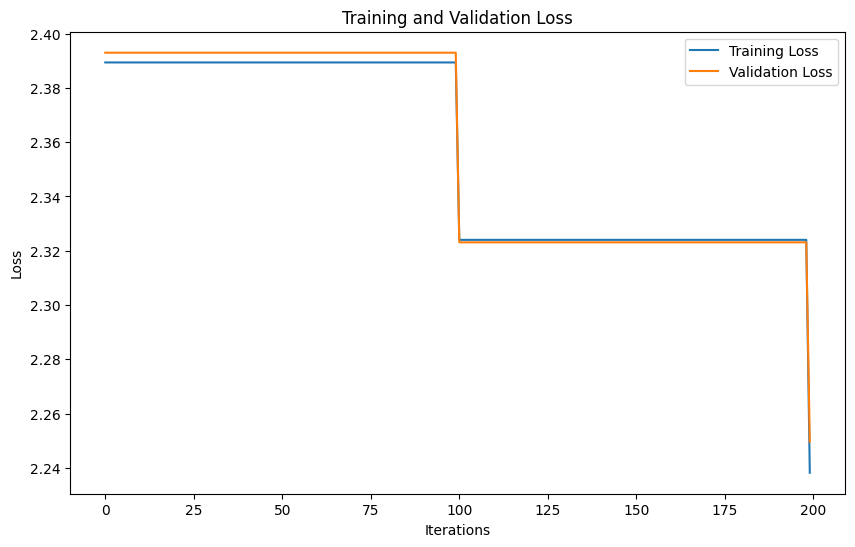

AttributeError: 'Experiment' object has no attribute 'log_artifact'

In [37]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import keepsake
import matplotlib.pyplot as plt

# hyperparameters
batch_size = 16
block_size = 32
max_iters = 200
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)

# Initialize the experiment with hyperparameters
experiment = keepsake.init(
    params={"batch_size": batch_size, "block_size": block_size, "max_iters": max_iters, "learning_rate": learning_rate},
)

# Your existing code here...

train_losses = []
val_losses = []

for iter in range(max_iters):
    model.train()

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        torch.save(model, "model.pth")
        # Create a checkpoint within the experiment.
        # This saves the metrics at that point, and makes a copy of the file
        # or directory given, which could weights and any other artifacts.
        experiment.checkpoint(
            path="model.pth",
            step=iter,
            primary_metric=("loss", "minimize"),
        )

    # Save the training and validation losses
    train_losses.append(losses['train'])
    val_losses.append(losses['val'])

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# Plot the training and validation loss values
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Save the plot as an artifact within the Keepsake experiment
experiment.log_artifact(plt, "training_validation_loss_plot", "Training and Validation Loss Plot")

# Mark the end of the experiment
experiment.stop()

═══╡ Creating experiment d8f57d8...
═══╡ Creating checkpoint bac9626, copying 'model.pth' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


step 0: train loss 2.1206, val loss 2.1365


═══╡ Creating checkpoint 0443026, copying 'model.pth' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


step 100: train loss 2.1009, val loss 2.1077


═══╡ Creating checkpoint 91b09f8, copying 'model.pth' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


step 199: train loss 2.0412, val loss 2.0538


═══╡ Creating checkpoint 1ab1a5b, copying 'training_validation_loss_plot.png' to 'file:///content/drive/MyDrive/saved_models/Dream4.keepsake' in the background...


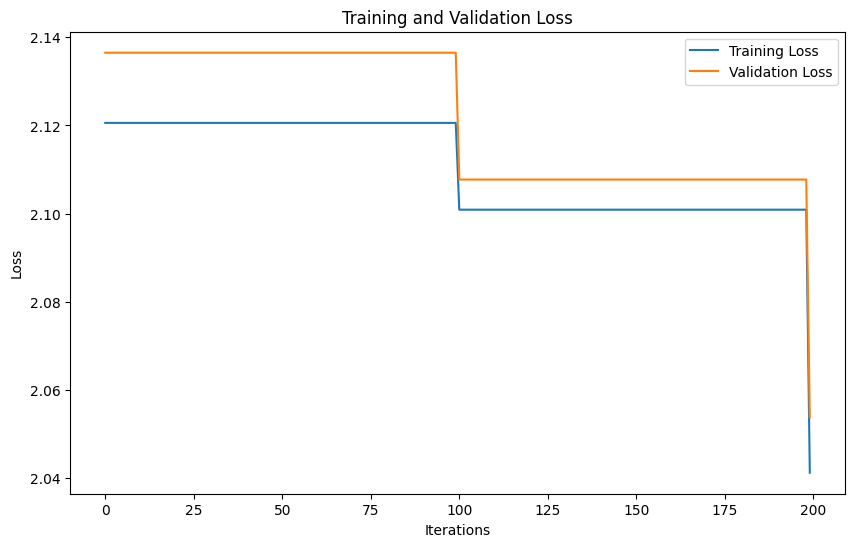

In [40]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import keepsake
import matplotlib.pyplot as plt

# hyperparameters
batch_size = 16
block_size = 32
max_iters = 200
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)

# Initialize the experiment with hyperparameters
experiment = keepsake.init(
    params={"batch_size": batch_size, "block_size": block_size, "max_iters": max_iters, "learning_rate": learning_rate},
)

# Your existing code here...

train_losses = []
val_losses = []

for iter in range(max_iters):
    model.train()

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        torch.save(model, "model.pth")
        # Create a checkpoint within the experiment.
        # This saves the metrics at that point, and makes a copy of the file
        # or directory given, which could weights and any other artifacts.
        experiment.checkpoint(
            path="model.pth",
            step=iter,
            primary_metric=("loss", "minimize"),
        )

    # Save the training and validation losses
    train_losses.append(losses['train'])
    val_losses.append(losses['val'])

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# Plot the training and validation loss values
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('training_validation_loss_plot.png')

# Log the plot as an artifact within the Keepsake experiment
experiment.checkpoint(
    path='training_validation_loss_plot.png',
    step=max_iters,
    primary_metric=("loss", "minimize"),
)

# Mark the end of the experiment
experiment.stop()

In [43]:
! echo 'repository: "file://.keepsake"' > keepsake.yaml

═══╡ Creating experiment 9f747f8...
═══╡ Creating checkpoint 0b7ade2, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 0: train loss 1.9991, val loss 2.0156


═══╡ Creating checkpoint 8cb95ef, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 100: train loss 1.9960, val loss 2.0066


═══╡ Creating checkpoint 271fee1, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 200: train loss 1.9686, val loss 1.9815


═══╡ Creating checkpoint 6099ab0, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 300: train loss 1.9278, val loss 1.9445


═══╡ Creating checkpoint b412258, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 400: train loss 1.8935, val loss 1.9114


═══╡ Creating checkpoint f42cde7, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 500: train loss 1.8684, val loss 1.8772


═══╡ Creating checkpoint 6f41b0e, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 600: train loss 1.8478, val loss 1.8548


═══╡ Creating checkpoint 0cadabd, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 700: train loss 1.8169, val loss 1.8453


═══╡ Creating checkpoint dfa7420, copying 'model.pth' to 'file:///content/.keepsake' in the background...


step 799: train loss 1.8194, val loss 1.8334


═══╡ Creating checkpoint 1a890f5, copying 'training_validation_loss_plot.png' to 'file:///content/.keepsake' in the background...


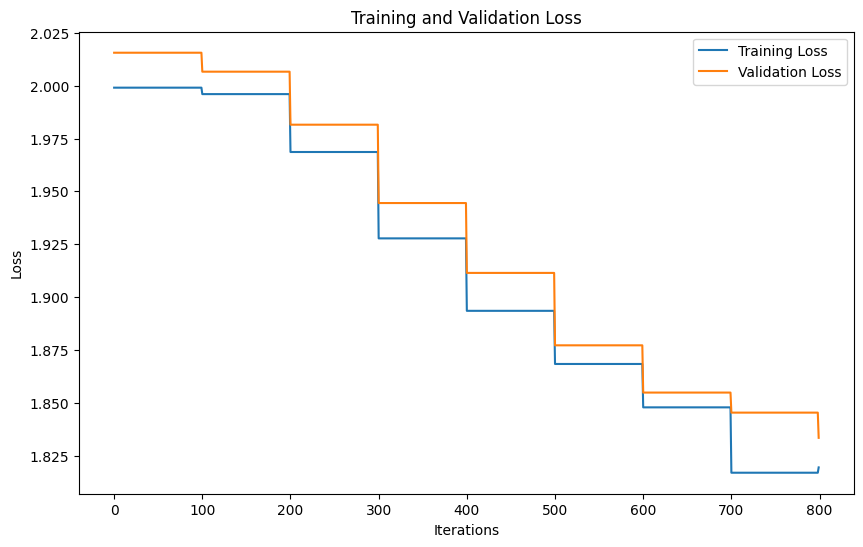

In [48]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import keepsake
import matplotlib.pyplot as plt

# hyperparameters
batch_size = 16
block_size = 32
max_iters = 800
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)

# Initialize the experiment with hyperparameters
experiment = keepsake.init(
    params={"batch_size": batch_size, "block_size": block_size, "max_iters": max_iters, "learning_rate": learning_rate},
)

# Your existing code here...

train_losses = []
val_losses = []

for iter in range(max_iters):
    model.train()

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        torch.save(model, "model.pth")
        # Create a checkpoint within the experiment.
        # This saves the metrics at that point, and makes a copy of the file
        # or directory given, which could weights and any other artifacts.
        experiment.checkpoint(
            path="model.pth",
            step=iter,
            primary_metric=("loss", "minimize"),
        )

    # Save the training and validation losses
    train_losses.append(losses['train'])
    val_losses.append(losses['val'])

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# Plot the training and validation loss values
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('training_validation_loss_plot.png')

# Log the plot as an artifact within the Keepsake experiment
experiment.checkpoint(
    path='training_validation_loss_plot.png',
    step=max_iters,
    primary_metric=("loss", "minimize"),
)

# Mark the end of the experiment
experiment.stop()

In [ ]:
'''
import torch
from torch import nn
from torch.autograd import Variable

import keepsake

def train(learning_rate=0.1, num_epochs=25):
    # Create an "experiment". This represents a run of your training script.
    # It saves the hyperparameters you used to start the experiment.
    experiment = keepsake.init(
        params={"learning_rate": learning_rate, "num_epochs": num_epochs},
    )

    model = BigramLanguageModel()
    m = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for iter in range(max_iters):
        model.train()
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss()
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

            torch.save(model, "model.pth")
            # Create a checkpoint within the experiment.
            # This saves the metrics at that point, and makes a copy of the file
            # or directory given, which could weights and any other artifacts.
            experiment.checkpoint(
                path="model.pth",
                step=max_iters,
                metrics={"loss": loss.item(), "accuracy": acc},
                primary_metric=("loss", "minimize"),
            )
        # sample a batch of data
        xb, yb = get_batch('train')

        # evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # Mark the end of the experiment
    experiment.stop()

train(learning_rate=0.1, num_epochs=25)
'''

In [ ]:
'''
import torch
from torch import nn
from torch.autograd import Variable

import keepsake

def train(learning_rate=0.1, num_epochs=25):
    # Create an "experiment". This represents a run of your training script.
    # It saves the hyperparameters you used to start the experiment.
    experiment = keepsake.init(
        params={"learning_rate": learning_rate, "num_epochs": num_epochs},
    )

    model = BigramLanguageModel()
    m = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for iter in range(max_iters):
        model.train()
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss()
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

            # Save model checkpoint
            torch.save(model.state_dict(), "model.pth")

            # Create a checkpoint within the experiment.
            # This saves the metrics at that point, and makes a copy of the file
            # or directory given, which could weights and any other artifacts.
            experiment.checkpoint(
                path="model.pth",
                step=iter,
                metrics={"train_loss": losses["train"], "val_loss": losses["val"]},
                primary_metric=("loss", "minimize"),
            )

        # Sample a batch of data
        xb, yb = get_batch('train')

        # Evaluate the loss
        logits, loss = model(xb, yb)  # Assuming model returns logits and loss
        logits = torch.tensor(logits)
        yb = torch.tensor(yb)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # Mark the end of the experiment
    experiment.stop()
'''



In [ ]:
'''
import torch
import torch.nn as nn
from torch.nn import functional as F
import keepsake

def train(learning_rate, num_epochs):
    # Initialize the experiment with hyperparameters
    experiment = keepsake.init(
        params={"batch_size": batch_size, "block_size": block_size, "max_iters": max_iters, "learning_rate": learning_rate},
    )

    # Your existing code here...

    for iter in range(max_iters):
        model.train()

        # every once in a while evaluate the loss on train and val sets
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss()
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        # sample a batch of data
        xb, yb = get_batch('train')

        # evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # Mark the end of the experiment
    experiment.stop()

# Your hyperparameters and initialization code
batch_size = 16
block_size = 32
max_iters = 600
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)
train(learning_rate, num_epochs)
'''

In [ ]:
'''
import torch
from torch import nn
from torch.autograd import Variable
import keepsake

def train(learning_rate=0.1, num_epochs=25):
    # Create an "experiment". This represents a run of your training script.
    # It saves the hyperparameters you used to start the experiment.
    experiment = keepsake.init(
        params={"learning_rate": learning_rate, "num_epochs": num_epochs},
)


    # Your existing setup code here...

    for epoch in range(num_epochs):
        model.train()

        # every once in a while evaluate the loss on train and val sets
        if epoch % eval_interval == 0 or epoch == num_epochs - 1:
            losses = estimate_loss()
            print(f"Epoch {epoch}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        # sample a batch of data
        xb, yb = get_batch('train')

        # evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        # Checkpoint the model and metrics

        experiment.checkpoint(
            path="/content/drive/MyDrive/saved_models/johnny1.keepsake",
            step=epoch,
            metrics={"loss": loss.item()},
            primary_metric=("loss", "minimize"),
        )

    # Mark experiment as stopped
    experiment.stop()
# Run the training function
train(learning_rate=1e-3, num_epochs=200)
'''

In [ ]:
! echo 'repository: "file:///content/drive/MyDrive/saved_models/Dream3.keepsake"' > keepsake.yaml


In [ ]:
train(learning_rate=0.1, num_epochs=25)

In [ ]:
import keepsake
from keepsake import experiments

experiments = keepsake.experiments.list()
for experiment in experiments:
    print(experiment)


In [ ]:
experiment = keepsake.experiments.list()[0]

# or, if you want to get a particular experiment by its ID:
# experiment = keepsake.experiments.get("fb7202b")

experiment

In [ ]:
experiment.params

In [ ]:
experiment.checkpoints[1].metrics

In [ ]:
experiments = keepsake.experiments.list()
experiments.plot()

In [ ]:
'''
import torch
import keepsake

def train(learning_rate, num_epochs):
    # Save training code and hyperparameters
    experiment = keepsake.init(
        repository="/content/drive/MyDrive/saved_models",
        directory = "keepsake.yaml",
        params={"learning_rate": learning_rate, "num_epochs": num_epochs},
    )

    # Initialize your model
    model = Model()
    model = model.to(device)  # Assuming 'device' is defined

    for epoch in range(num_epochs):
        # ... train step ...

        # Save model weights and metrics
        torch.save(model.state_dict(), f"model_{epoch}.pth")
        experiment.checkpoint(
            path=f"model_{epoch}.pth",
            metrics={"loss": loss, "accuracy": accuracy}
        )
'''

In [ ]:
'''
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Generate some dummy data
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define the checkpoint callback
checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model
model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
'''

In [ ]:
'''
import keepsake

max_iters = 10000
eval_interval = 100
num_epochs = 50
learning_rate = 0.001

# Save training code and hyperparameters
experiment = keepsake.init(
    directory="/content/drive/MyDrive/saved_models/",
    params={"learning_rate": learning_rate, "num_epochs": num_epochs},
)

# Rest of your code...

for iter in range(max_iters):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        # Log metrics
        experiment.keep_metrics({"train_loss": losses['train'], "val_loss": losses['val']}, step=iter)

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    # Save model weights
    experiment.keep_checkpoint(model.state_dict(), step=iter)

# Save final model weights
experiment.keep_checkpoint(model.state_dict(), step=max_iters, name="final_model")
'''

#16. Saving model

In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/saved_models/modelboy_l6.h5')
# Save model weights and metrics
experiment.checkpoint(
    path="/content/drive/MyDrive/NanoGPT Trials/Layer 2 New/modelboy_l6.h5",
          metrics={"loss": loss, "accuracy": accuracy}
        })

#17. Prompting and output

In [ ]:

# Load the model and move it to the same device as the tokens
model = BigramLanguageModel().to(device)
state_dict = torch.load('/content/drive/MyDrive/saved_models/modelboy_l6.h5')
model.load_state_dict(state_dict)
model.eval()

# Tokenize the starting prompt
prompt = "what is the difference between harry and hagrid"
tokens = torch.tensor(encode(prompt), dtype=torch.long).unsqueeze(0).to(device)

# Generate the conversation
max_tokens = 2000
word_count = 0

# Generate up to max_tokens words
for _ in range(max_tokens):
    # Generate the next token
    with torch.no_grad():
        output = model.generate(tokens, max_new_tokens=1)
    new_token = output[:, -1].item()

    # Convert the new token to a character and append to the prompt
    new_char = itos[new_token]
    if new_char == '':
      word_count += 1
    tokens = torch.cat((tokens, torch.tensor([[new_token]], device=device)), dim=1)

    if word_count >= 2000:
      break

# Convert the token indices to characters and join them into a string
generated_text = ''.join([itos[idx] for idx in tokens.squeeze().tolist()])

# Print the generated text
print(generated_text)

what is the difference between harry and hagrid twin over and broth
drofe. Throwing, thought of the troathed
on the growies pier and heads, shared vitia a sup) ”
gothe. Flaming!”

“I’ll goin od lood jon, I tried eer Isna had varching and riblin could be.
he threw and squaaatly from pointing himself than rest
broom. Throw, but Evera Thous.

“Well read onto easten bice kack
and brhing the corridors.

“I’m seed his going to first,” buars appoathed.

Anyther of threw, and Dout it? You not,”
beasle Harry tragain.”

“No, Peoll’s ofect of ‘necurious a
bump it ontention vooiced had an enough a plate hoot
class light back. “And was roop coldwing
broomsticks why hard gold, “ wream to an oving a such Gringer. Now were whole started narrow chocless, at
those innoeth!” he said?”

But he or starry, seaving, looking with seen. Wwasn’t
do you want to be about a laugh
boy ploce hard out up and under down
Hagrid that bosning?” Harry rosed piled corridor. “Professor Malkon, doces sharp stlyether later to

In [ ]:
'''
# List of 50 prompts
prompts = [
    "What is the difference between Harry and Hagrid?",
    "How did Voldemort lose his powers?",
    "Why did Dumbledore trust Snape?",
    "Describe a typical day in the life of a Hogwarts student.",
    "What are some magical creatures Harry encountered during his time at Hogwarts?",
    "Explain how the Triwizard Tournament works.",
    "Describe a spell that Harry learned in Defense Against the Dark Arts class.",
    "What is the significance of Harry's lightning-shaped scar?",
    "Discuss the relationship between Harry, Ron, and Hermione.",
    "Describe a Quidditch match at Hogwarts.",
    "What challenges did Harry face in the Chamber of Secrets?",
    "Explain the concept of Horcruxes and how they were used by Voldemort.",
    "Describe a lesson with Professor Snape in Potions class.",
    "Discuss the role of Dumbledore as headmaster of Hogwarts.",
    "Explain the history and significance of the Deathly Hallows.",
    "Describe a feast in the Great Hall at Hogwarts.",
    "Discuss the rivalry between Gryffindor and Slytherin houses.",
    "Describe a magical object that plays a key role in the Harry Potter series.",
    "Explain the process of brewing Polyjuice Potion.",
    "Discuss the significance of Harry's Patronus.",
    "Describe a visit to Hogsmeade village.",
    "Explain the concept of Animagi and how they are registered.",
    "Discuss the role of house-elves in the Wizarding World.",
    "Describe a visit to the Forbidden Forest at Hogwarts.",
    "Explain how the Marauder's Map works.",
    "Discuss the history and significance of the Mirror of Erised.",
    "Describe a magical creature from the Harry Potter series and its characteristics.",
    "Explain the rules and regulations of the Hogwarts Express train.",
    "Discuss the importance of wandlore in the Wizarding World.",
    "Describe a magical plant found in the Hogwarts greenhouse.",
    "Explain the significance of the Sorting Hat ceremony at Hogwarts.",
    "Discuss the role of the Ministry of Magic in regulating the Wizarding World.",
    "Describe a magical duel between two characters in the Harry Potter series.",
    "Explain the role of the Triwizard Cup in the Triwizard Tournament.",
    "Discuss the significance of the Yule Ball in the fourth Harry Potter book.",
    "Describe a magical object from the Harry Potter series that has the power to transport individuals.",
    "Explain the process of creating a Horcrux and why it is considered dark magic.",
    "Discuss the importance of Quidditch in the Wizarding World.",
    "Describe a magical creature that is considered dangerous in the Harry Potter series.",
    "Explain the concept of Occlumency and why it is important for wizards to learn.",
    "Discuss the role of the Hogwarts Express train in transporting students to Hogwarts.",
    "Describe a magical artifact that plays a key role in one of the Harry Potter books.",
    "Explain the concept of the Triwizard Tournament and how it is organized.",
    "Discuss the importance of the Room of Requirement in the Harry Potter series.",
    "Describe a magical spell that is used for defensive purposes in the Wizarding World.",
    "Explain the significance of the prophecy regarding Harry and Voldemort.",
    "Discuss the role of house points in determining the House Cup winner at Hogwarts.",
    "Describe a magical creature that is considered to be mythical in the Harry Potter series.",
    "Explain the concept of the Unbreakable Vow and its consequences.",
    "Discuss the role of the Hogwarts ghosts in the Harry Potter series.",
    "Describe a magical object that has the power to manipulate time.",
    "Explain the significance of Harry's Invisibility Cloak in the Harry Potter series."
]

# Move the entire model to the same device as the tokens
model.to(device)

# Generate text for each prompt
for i, prompt in enumerate(prompts):
    print(f"Generating text for prompt {i + 1}")

    # Tokenize the starting prompt
    tokens = torch.tensor(encode(prompt), dtype=torch.long).unsqueeze(0).to(device)
    max_tokens = 2000
    word_count = 0

    # Generate up to max_tokens words
    for _ in range(max_tokens):
        with torch.no_grad():
            output = model.generate(tokens, max_new_tokens=1)
        new_token = output[:, -1].item()
        new_char = itos[new_token]
        if new_char == '':
            word_count += 1
        new_tensor = torch.tensor([[new_token]], device=device)
        tokens = torch.cat((tokens, new_tensor), dim=1)

        if word_count >= 15000:
            break

    # Convert the token indices to characters and join them into a string
    generated_text = ''.join([itos[idx] for idx in tokens.squeeze().tolist()])
    print(generated_text)
'''

'\n# List of 50 prompts\nprompts = [\n    "What is the difference between Harry and Hagrid?",\n    "How did Voldemort lose his powers?",\n    "Why did Dumbledore trust Snape?",\n    "Describe a typical day in the life of a Hogwarts student.",\n    "What are some magical creatures Harry encountered during his time at Hogwarts?",\n    "Explain how the Triwizard Tournament works.",\n    "Describe a spell that Harry learned in Defense Against the Dark Arts class.",\n    "What is the significance of Harry\'s lightning-shaped scar?",\n    "Discuss the relationship between Harry, Ron, and Hermione.",\n    "Describe a Quidditch match at Hogwarts.",\n    "What challenges did Harry face in the Chamber of Secrets?",\n    "Explain the concept of Horcruxes and how they were used by Voldemort.",\n    "Describe a lesson with Professor Snape in Potions class.",\n    "Discuss the role of Dumbledore as headmaster of Hogwarts.",\n    "Explain the history and significance of the Deathly Hallows.",\n    "D

In [ ]:
'''
# List of 50 prompts
prompts = [
    "What is the difference between Harry and Hagrid?",
    "How did Voldemort lose his powers?",
    "Why did Dumbledore trust Snape?",
    # Add your remaining prompts here
]

# Move the entire model to the same device as the tokens
model.to(device)

# Generate the conversation for each prompt
for i, prompt in enumerate(prompts):
    print(f"Generating text for prompt {i + 1}")
    tokens = torch.tensor(encode(prompt), dtype=torch.long).unsqueeze(0).to(device)
    max_tokens = 2000
    word_count = 0
    while True:
        with torch.no_grad():
            output = model.generate(tokens, max_new_tokens=1)
        new_token = output[:, -1].item()
        new_char = itos[new_token]
        if new_char == '':
            word_count += 1
        new_tensor = torch.tensor([[new_token]], device=device)
        tokens = torch.cat((tokens, new_tensor), dim=1)

        if word_count >= 2000:
            break

    generated_text = ''.join([itos[idx] for idx in tokens.squeeze().tolist()])
    print(generated_text)
'''

'\n# List of 50 prompts\nprompts = [\n    "What is the difference between Harry and Hagrid?",\n    "How did Voldemort lose his powers?",\n    "Why did Dumbledore trust Snape?",\n    # Add your remaining prompts here\n]\n\n# Move the entire model to the same device as the tokens\nmodel.to(device)\n\n# Generate the conversation for each prompt\nfor i, prompt in enumerate(prompts):\n    print(f"Generating text for prompt {i + 1}")\n    tokens = torch.tensor(encode(prompt), dtype=torch.long).unsqueeze(0).to(device)\n    max_tokens = 2000\n    word_count = 0\n    while True:\n        with torch.no_grad():\n            output = model.generate(tokens, max_new_tokens=1)\n        new_token = output[:, -1].item()\n        new_char = itos[new_token]\n        if new_char == \'\':\n            word_count += 1\n        new_tensor = torch.tensor([[new_token]], device=device)\n        tokens = torch.cat((tokens, new_tensor), dim=1)\n\n        if word_count >= 2000:\n            break\n\n    generated_

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to save the file
file_path = '/content/drive/My Drive/saved_models/generated_text_l06.txt'

# Write text to file
with open(file_path, 'w') as file:
    file.write(generated_text)

print("Text saved to file.")


Text saved to file.


#17. Analysing Accuracy


In [ ]:
import re
import json

# Function to tokenize text into words
def tokenize(text):
    return set(re.findall(r'\b\w+\b', text.lower()))

# Load the contents of both files
file1_path = '/content/drive/MyDrive/saved_models/sorcerers-stone.txt'
file2_path = '/content/drive/MyDrive/saved_models/generated_text_l06.txt'

with open(file1_path, 'r', encoding='utf-8') as file1:
    text1 = file1.read()

with open(file2_path, 'r', encoding='utf-8') as file2:
    text2 = file2.read()

# Tokenize the text into words
words_file1 = tokenize(text1)
words_file2 = tokenize(text2)

# Calculate the number of words in file 2 that are also in file 1
matching_words = len(words_file2.intersection(words_file1))

# Calculate the accuracy
accuracy = matching_words / len(words_file2) if len(words_file2) > 0 else 0

print(f"Number of matching words: {matching_words}")
print(f"Accuracy: {accuracy}")

# Save the dictionaries to files
dict1_path = '/content/drive/MyDrive/saved_models/dict3.json'
dict2_path = '/content/drive/MyDrive/saved_models/dict4.json'




Number of matching words: 144
Accuracy: 0.5647058823529412
